## **Случайные события. Практическая работа**

### Итоги модуля
В этом модуле было введено понятие **пространства элементарных событий**. Это пространство состоит из различных **исходов** случайной величины. Вероятности элементарных событий в этом пространстве будут принимать значения от 0 до 1. 

В пространстве событий помимо **элементарных** исходов есть также **сложные** события, являющиеся объединением нескольких элементарных. 

Вы также познакомились с **зависимыми** событиями и понятием **условной вероятности**. На основе этого определения строится **формула Байеса**. Она связывает теоретические вероятности осуществления события (**априорная** вероятность) с вероятностями, основанными на некотором опыте (условная или **апостериорная** вероятность). Эта формула позволяет как бы «поменять местами» причину и следствие — получить взаимосвязь между P(A|B) и P(B|A).

Эта практическая работа поможет закрепить полученные знания. В одной части заданий нужно вычислить вероятности сложных событий. Другая часть заданий посвящена применению теоремы Байеса, а также включает в себя краткое знакомство с **наивным байесовским классификатором (НБК)** — одной из моделей машинного обучения.

Основную информацию, необходимую для решения данной практической работы, можно найти в теоретическом разделе этого модуля. Критерии оценки заданий основаны на полноте и правильности решений, а также правильности/неправильности финальных ответов. 

### Цели практической работы
- закрепить полученные знания о вычислении вероятностей сложных событий;
- ближе познакомиться с условными вероятностями, теоремой Байеса и байесовским классификатором.

### Что оценивается
Умение вычислять вероятности сложных событий и вероятности с использованием теоремы Байеса, понимание условных вероятностей. В каждой задаче требуется соотнести набор известных значений вероятностей с условными вероятностями и вычислить новые вероятности. Задача считается решённой, если выполнены все её условия, а также даны правильные ответы на вопросы.

### Как отправить задание на проверку
Выполните задания, сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него через форму.


### **Задание 1**

Даны таблицы с суммами и произведениями значений при броске двух кубиков. Используя эти таблицы, вычислите вероятности следующих сложных событий.

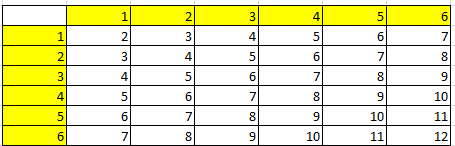
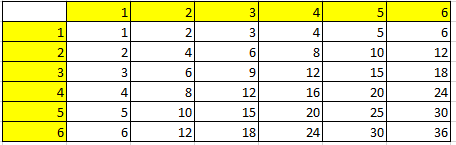





In [167]:
import pandas as pd
from fractions import Fraction

In [168]:
def create_sum_list():
    num_list = [i + j for i in range(1, 7) for j in range(1, 7)]
    return num_list

def create_product_list():
    num_list = [i * j for i in range(1, 7) for j in range(1, 7)]
    return num_list


sum_list = create_sum_list()
product_list = create_product_list()
print(f'{len(sum_list)}\n{len(product_list)}')

36
36


In [169]:
# Да, я не забыл про тот мощный инструмент (eval), что вы мне присоветовали :)

def calculate_probability_table(cond, num_list):
    positive_outcomes = [i for i in num_list if eval(cond)]
    probability = len(positive_outcomes) / len(num_list)
    return probability

def calculate_probability_table_2(cond, num_list):
    positive_outcomes = [(i + j) for i in range(1,7) for j in range(1,7) if eval(cond)]
    probability = len(positive_outcomes) / len(num_list)
    return probability

def display_result(res):
    frac = Fraction(res).limit_denominator()
    percent = round((res * 100), 2)
    print(f"The probability equals to {frac} or {percent}%.")

1. Вероятность, что полученная сумма значений на кубиках — нечётное число.

In [170]:
clause = 'i % 2 != 0'
result = calculate_probability_table(clause, sum_list)
display_result(result)

The probability equals to 1/2 or 50.0%.


2. Вероятность, что полученная сумма значений на кубиках — число, кратное трём.



In [171]:
clause = 'i % 3 == 0'
result = calculate_probability_table(clause, sum_list)
display_result(result)

The probability equals to 1/3 or 33.33%.


3. Вероятность, что сумма будет меньше пяти или больше десяти.


In [172]:
clause = 'i < 5 or i > 10'
result = calculate_probability_table(clause, sum_list)
display_result(result)

The probability equals to 1/4 or 25.0%.


4. Вероятность, что произведение значений будет равно двенадцати.


In [173]:
clause = 'i == 12'
result = calculate_probability_table(clause, product_list)
display_result(result)

The probability equals to 1/9 or 11.11%.


5. Вероятность, что произведение значений — нечётно.


In [174]:
clause = 'i % 2 != 0'
result = calculate_probability_table(clause, sum_list)
display_result(result)

The probability equals to 1/2 or 50.0%.


6. Вероятность, что сумма значений окажется больше или равной их произведению.

In [175]:
clause = '(i + j) > (i * j)'
result = calculate_probability_table_2(clause, sum_list)
display_result(result)

The probability equals to 11/36 or 30.56%.


### **Задание 2**
Загрузите данные о пассажирах «Титаника» из файла titanic.csv в приложенных к практической работе файлах. Ограничьтесь набором таких переменных, как класс билета пассажира, пол и переменной, показывающей, выжил он или нет. В этом датасете все эти переменные заполнены непустым значением.


In [176]:
titanic = pd.read_csv("train.csv")
X = titanic[['PassengerId','Survived','Pclass','Sex']]

In [177]:
X.head()

,PassengerId,Survived,Pclass,Sex
0,1,0,3,male
1,2,1,1,female
2,3,1,3,female
3,4,1,1,female
4,5,0,3,male


1. Запишите в P_fem вероятность, что случайный пассажир «Титаника» — женщина.


In [178]:
total_females = len(X[X.Sex == 'female'])
total_passengers = len(X)
P_fem = total_females / total_passengers
display_result(P_fem)

The probability equals to 314/891 or 35.24%.


2. Запишите в P_1class вероятность, что случайный пассажир «Титаника» ехал в первом классе.


In [179]:
total_1class = len(X[X.Pclass == 1])
P1_class = total_1class / total_passengers
display_result(P1_class)
 

The probability equals to 8/33 or 24.24%.


3. Запишите в P_surv вероятность, что случайный пассажир «Титаника» выжил.


In [180]:
total_survived_qty = len(X[X.Survived == 1])
P_surv = total_survived_qty / total_passengers
display_result(P_surv)

The probability equals to 38/99 or 38.38%.


4. Запишите в P_fem_surv вероятность, что пассажир — женщина, и одновременно с этим пассажир выжила в катастрофе.


In [181]:
# Правильный вариант
survived_females = len(X[(X.Sex == 'female') & (X.Survived == 1)])
P_fem_surv = survived_females / total_passengers
display_result(P_fem_surv)

The probability equals to 233/891 or 26.15%.


5. Найдите условную вероятность того, что пассажир выживет, при условии, если пассажир — женщина.


### Возьмём формулу полной вероятности
$$
P(A) = P(A | B_1) P(B_1) + P(A | B_2) P(B_2) + P(A | B_3) P(B_3)
$$

### В нашем случае:
- $A$ — это событие, что пассажир является женщиной и выжила.
- $B_1, B_2, B_3$ — это три класса пассажиров.
  
Чтобы применить формулу полной вероятности, нужно найти:
1. Условные вероятности выживания женщины в каждом классе $P(A | B_1)$, $P(A | B_2)$, $P(A | B_3)$.
2. Вероятности того, что женщина находится в каждом классе $P(B_1)$, $P(B_2)$, $P(B_3)$.


In [182]:
# Вариант по формуле

# Calculate probabilities of being in each class (only for females)
females_1class_qty = len(X[(X['Pclass'] == 1) & (X['Sex'] == 'female')])
females_2class_qty = len(X[(X['Pclass'] == 2) & (X['Sex'] == 'female')])
females_3class_qty = len(X[(X['Pclass'] == 3) & (X['Sex'] == 'female')])
total_females = len(X[X['Sex'] == 'female'])

P_B1 = females_1class_qty / total_females
P_B2 = females_2class_qty / total_females
P_B3 = females_3class_qty / total_females

# Calculate conditional probabilities of survival in each class (only for females)
survived_1class_females = len(X[(X.Pclass == 1) & (X.Survived == 1) & (X.Sex == 'female')])
survived_2class_females = len(X[(X.Pclass == 2) & (X.Survived == 1) & (X.Sex == 'female')])
survived_3class_females = len(X[(X.Pclass == 3) & (X.Survived == 1) & (X.Sex == 'female')])

P_A_B1 = survived_1class_females / females_1class_qty
P_A_B2 = survived_2class_females / females_2class_qty
P_A_B3 = survived_3class_females / females_3class_qty

# Apply the law of total probability
P_fem_surv_total = P_A_B1 * P_B1 + P_A_B2 * P_B2 + P_A_B3 * P_B3

display_result(P_fem_surv_total)


The probability equals to 233/314 or 74.2%.


In [183]:
# Правильный вариант
P_cond_surv_fem = survived_females / total_females
display_result(P_cond_surv_fem)

The probability equals to 233/314 or 74.2%.


6. По аналогии найдите вероятность того, что пассажир выживет, если пассажир ехал в первом классе.


In [184]:
survived_1class_qty = len(X[(X.Pclass == 1) & (X.Survived == 1)])
P_cond_surv_1class = survived_1class_qty / total_1class
display_result(P_cond_surv_1class)

The probability equals to 17/27 or 62.96%.


7. Найдите вероятность того, что пассажир выживет при условии, что пассажир ехал в первом классе и является женщиной.


Формула для условной вероятности выглядит так:
$$
P(\text{Survived} \, | \, \text{Female} \cap \text{1st Class}) = \frac{P(\text{Survived} \cap \text{Female} \cap \text{1st Class})}{P(\text{Female} \cap \text{1st Class})}
$$


In [185]:
# Правильный вариант
P_cond_surv_1class_fem = survived_1class_females / females_1class_qty
display_result(P_cond_surv_1class_fem)

The probability equals to 91/94 or 96.81%.


8. Найдите вероятность того, что пассажир выживет при условии, что пассажир ехал во втором классе и является мужчиной.


In [186]:
survived_2class_males = len(X[(X.Pclass == 2) & (X.Survived == 1) & (X.Sex == 'male')])
total_2class_males = len(X[(X.Pclass == 2) & (X.Sex == 'male')])
P_cond_surv_m = survived_2class_males / total_2class_males
display_result(P_cond_surv_m)

The probability equals to 17/108 or 15.74%.


9. Используя посчитанные вероятности, найдите вероятность того, что случайно выбранный пассажир — женщина, если мы знаем, что пассажир выжил.

### Введём обозначения

$P(Ж)$ - вероятность выбрать женщину (`P_fem`)

$P(В)$ - вероятность выживания (`P_surv`)

$P(Ж|В)$ - вероятность выживания женщины (`P_cond_surv_fem`)

$P(В|Ж)$ - ?

По теореме Байеса: 

$$
P(В|Ж) = \frac{P(Ж | В) \cdot P(Ж)}{P(B)}
$$

In [187]:
# Вариант по формуле
P_cond_fem_surv = (P_cond_surv_fem * P_fem) / P_surv
display_result(P_cond_fem_surv)

The probability equals to 233/342 or 68.13%.


In [188]:
# Правильный вариант 
P_cond_fem_surv = survived_females / total_survived_qty
display_result(P_cond_fem_surv)

The probability equals to 233/342 or 68.13%.


10. Используя посчитанные вероятности, найдите вероятность того, что случайно выбранный пассажир ехал в первом классе, если мы знаем, что пассажир выжил.


### Введём обозначения

$P(1)$ - вероятность выбрать пассажира первого класса (`P1_class`)

$P(В)$ - вероятность выживания (`P_surv`)

$P(1|В)$ - вероятность выживания пассажира первого класса (`P_cond_surv_1class`)

$P(В|1)$ - ?

По теореме Байеса: 

$$
P(В|1) = \frac{P(1 | В) \cdot P(1)}{P(B)}
$$


In [189]:
# Вариант по формуле
P_cond_1class_1class = (P_cond_surv_1class * P1_class) / P_surv
display_result(P_cond_1class_1class)

The probability equals to 68/171 or 39.77%.


In [190]:
# Правильный вариант
P_cond_1class_1class = survived_1class_qty / total_survived_qty
display_result(P_cond_1class_1class)

The probability equals to 68/171 or 39.77%.


11. Сравните полученные вероятности с безусловными вероятностями соответствующих событий. Объясните разницу в значениях.

1. **Безусловные вероятности:**
   - **P_fem_surv (вероятность того, что пассажир — женщина и выжила):** 0.2615
     Это безусловная вероятность сочетания двух событий — быть женщиной и выжить.

2. **Условные вероятности:**
   - **P_cond_surv_fem (вероятность выживания при условии, что пассажир — женщина):** 0.7420
     Эта вероятность выше, чем безусловная, так как рассматриваются только женщины. Среди женщин вероятность выживания заметно выше, чем в общей выборке.

   - **P_cond_surv_1class (вероятность выживания при условии, что пассажир ехал в первом классе):** 0.6296
     Первая группа класса имела лучшее положение на корабле и доступ к спасательным шлюпкам, что объясняет высокий шанс выживания.

   - **P_cond_surv_1class_fem (вероятность выживания для женщин из первого класса):** 0.9681
     Женщины из первого класса были наиболее защищены, что делает эту вероятность самой высокой. Этот факт связан с правилами эвакуации "женщины и дети первыми", особенно для пассажиров первого класса.

   - **P_cond_surv_2class_male (вероятность выживания для мужчин из второго класса):** 0.1574
     Мужчины второго класса имели гораздо меньшие шансы на выживание по сравнению с женщинами или пассажирами первого класса.

   - **P_cond_fem_surv (вероятность, что пассажир — женщина, при условии, что он выжил):** 0.6813
     Если пассажир выжил, то вероятность того, что это была женщина, достаточно высока, что отражает дисбаланс в шансах выживания между мужчинами и женщинами.

   - **P_cond_1class_surv (вероятность, что пассажир ехал в первом классе, при условии, что он выжил):** 0.3977
     Вероятность того, что выживший пассажир был из первого класса, почти 40%, что отражает преимущество пассажиров первого класса.

**Объяснение разницы:**

Условные вероятности дают больше информации, так как они основаны на дополнительной информации (например, "если пассажир — женщина" или "если пассажир из первого класса"). Это помогает лучше понять вероятность выживания для конкретных групп. Например, среди всех пассажиров вероятность выживания ниже, но среди женщин или пассажиров первого класса — значительно выше, что связано с доступом к спасательным шлюпкам и приоритетами спасения.

.

### **Задание 3**
Рассмотрим датасет со статистикой почтового ящика `letters.xlsx`. Данные можно найти в материалах к практической работе. Там содержится 248 записей с информацией о письмах. 

Нам хочется узнать, является ли новое письмо, пришедшее к нам на почту, спамом. Для этого у нас существует статистика писем. Каждое пришедшее письмо может быть либо спамом, либо нет. При этом и спам, и нормальные письма могут содержать слова, характерные для спам-писем. Данный датасет представляет собой набор записей с информацией о пришедших ранее письмах, распознанных человеком как спам или нет. 




In [191]:
df = pd.read_excel('letters.xlsx', sheet_name='Sheet1', index_col='id_letter')
df

,spam,spam_words
id_letter,,
1,да,нет
2,да,да
3,нет,нет
4,нет,да
5,да,да
...,...,...
244,нет,нет
245,нет,нет
246,нет,нет


Столбец `spam` отвечает на вопрос, является письмо спамом или нет, `spam_words` — содержит ли оно слова, встречающиеся в спам-письмах.

1. Найдите долю спам-писем по отношению ко всем.



In [192]:
spam_letters = len(df[df.spam == 'да'])
print(spam_letters)
total_letters = len(df)
P_spam = spam_letters / total_letters
display_result(P_spam)

88
The probability equals to 11/31 or 35.48%.


2. Найдите долю писем со спам-подобными словами по отношению ко всем.


In [193]:
spam_words_qty = len(df[df.spam_words == 'да'])
print(spam_words_qty)
P_spam_words = spam_words_qty / total_letters
display_result(P_spam_words)

93
The probability equals to 3/8 or 37.5%.


3. Найдите вероятность, что письмо содержит спам-подобные слова при условии, что оно является спамом.


In [194]:
spam_words_spam = len(df[(df.spam_words == 'да') & (df.spam == 'да')])
print(spam_words_spam)
P_spam_words_cond = spam_words_spam / spam_letters
display_result(P_spam_words_cond)

32
The probability equals to 4/11 or 36.36%.


4. Найдите вероятность, что письмо является спамом при условии, что оно содержит спам-подобные слова.


In [195]:
P_spam_letters_cond = spam_words_spam / spam_words_qty
display_result(P_spam_letters_cond)

The probability equals to 32/93 or 34.41%.


С помощью такого принципа [работает наивный байесовский классификатор](https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%BF%D0%B0%D0%BC%D0%B0). При обучении модели для каждого встреченного в письмах слова высчитывается и сохраняется вероятность того, что письмо с этим словом — спам. И в дальнейшем, на основе наличия в письме слов с высокой вероятностью встречающихся в спам-письмах, машина может рассчитать условную вероятность того, что в таком случае письмо является спамом. Если эта вероятность превысит 0,5, можно положить такое письмо в спам. Более сложные модели учитывают не только наличие определённых слов, но и множество других факторов. Тем самым, по целому ряду свойств письма можно рассчитать соответствующую условную вероятность, что письмо будет спамом при условии, что оно обладает некоторым набором характеристик. Такой классификатор работает достаточно хорошо и быстро в простых ситуациях, однако он слишком завязан на варианты значений условий. Например, если в тренировочном датасете не встречалась определённая комбинация условных факторов, то классификатор не сможет оценить вероятность в ситуации, если такая комбинация встретится в тестовой выборке.